In [3]:
import numpy as np
import jax
import jax.numpy as jnp

import matplotlib.pyplot as plt
from envs.single_photon_env import SinglePhotonLangevinReadoutEnv
from utils import *

import pandas as pd

In [4]:
df = pd.read_csv('fig 4 pFs and times')
df.head()

,Unnamed: 0,kappas,chis,pFs from 0th action of batch,times from 0th action of batch,pFs from mean action,times from mean action,times from mean action to 0.1 photons
0,0,13.5945,1.850398,2.229631,0.419265,2.230940,0.421425,0.405405
1,1,14.3100,1.850398,2.228306,0.440055,2.225479,0.438323,0.418702
2,2,15.0255,1.850398,2.197127,0.426195,2.196273,0.426195,0.382882
3,3,13.5945,1.947787,2.226457,0.469508,2.233195,0.433125,0.429779
4,4,14.3100,1.947787,2.205454,0.405405,2.208597,0.402436,0.394282


In [5]:
actions = np.load('Smooth Final Action Batch Fig 4.npy')
print(actions.shape)

(9, 256, 121)


In [23]:
mean_actions = -jnp.mean(actions, axis=1)
mean_actions.shape

(9, 121)

In [12]:
np_data = df.to_numpy()
kappas = np_data[:, 1]
chis = np_data[:, 2]

kappas

array([13.5945, 14.31  , 15.0255, 13.5945, 14.31  , 15.0255, 13.5945,
       14.31  , 15.0255])

In [13]:
chis

array([1.85039807, 1.85039807, 1.85039807, 1.94778745, 1.94778745,
       1.94778745, 2.04517682, 2.04517682, 2.04517682])

In [19]:
vary_kappa_actions = mean_actions[3:6]
vary_kappa_actions.shape

(3, 121)

[2.23094018 2.22547854 2.19627256 2.23319517 2.20859701 2.20323231
 2.21102831 2.20243666 2.2051125 ]
[0.42142526 0.4383225  0.426195   0.433125   0.40243619 0.43659
 0.39691523 0.39705613 0.43514827]


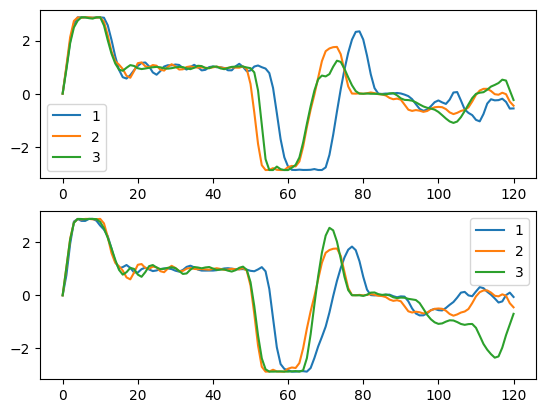

In [32]:
print(np_data[:, 5])
print(np_data[:, 6])

kappa_action_1 = mean_actions[3]
kappa_action_2 = mean_actions[4]
kappa_action_3 = mean_actions[5]

chi_action_1 = -mean_actions[1]
chi_action_2 = mean_actions[4]
chi_action_3 = -mean_actions[7]

fig, ax =  plt.subplots(2)



ax[0].plot(kappa_action_1, label='1')
ax[0].plot(kappa_action_2, label='2')
ax[0].plot(kappa_action_3, label='3')
ax[0].legend()

ax[1].plot(chi_action_1, label='1')
ax[1].plot(chi_action_2, label='2')
ax[1].plot(chi_action_3, label='3')
ax[1].legend()

plt.show()